In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use("dark_background")

In [88]:
"""
In the functions that follow, these paramaters are used:

x0: initial position
acc: acceleration (second derivative of x); a function should be provided for this
h: time step
time: the length of time of the simulation
v0: initial velocity

num_steps is the number of time steps that the algorithm should take
"""


# Acceleration:
def acc(x, w=1):
    return -(w**2)*x


def euler_algorithm(x0, acc, h, time=10, v0=0):
    num_steps = int(time/h)
    vs = np.zeros(num_steps+1)
    vs[0] = v0
    xs = np.zeros(num_steps+1)
    xs[0] = x0
    for i in range(num_steps):
        # Two Taylor expansions basically:
        xs[i+1] = xs[i] + vs[i] * h
        vs[i+1] = vs[i] + acc(xs[i]) * h
    return xs, vs


def euler_cromer_algorithm(x0, acc, h, time=10, v0=0):
    num_steps = int(time/h)
    vs = np.zeros(num_steps+1)
    vs[0] = v0
    xs = np.zeros(num_steps+1)
    xs[0] = x0
    # Algorithm as described in Wikipedia:
    for i in range(num_steps):
        vs[i+1] = vs[i] + acc(xs[i]) * h
        xs[i+1] = xs[i] + vs[i+1] * h
    return xs, vs



def leapfrog_algorithm(x0, acc, h, time=10, v0=0):
    num_steps = int(time/h)
    vs = np.zeros(num_steps+1)
    vs[0] = v0
    xs = np.zeros(num_steps+1)
    xs[0] = x0
    for i in range(num_steps):
        xs[i+1] = xs[i] + vs[i]*h + ((1/2) * acc(xs[i]) * h**2)
        vs[i+1] = vs[i] + (1/2) * (acc(xs[i]) + acc(xs[i+1])) * h
    return xs, vs


def verlet_algorithm(x0, acc, h, time=10, v0=0):
    num_steps = int(time/h)
    vs = np.zeros(num_steps+1)
    vs[0] = v0
    xs = np.zeros(num_steps+2)
    xs[0:2] = x0
    for i in range(1, num_steps+1):
        xs[i+1] = 2*xs[i] - xs[i-1] + acc(xs[i]) * h**2
        vs[i] = (xs[i+1] - xs[i-1]) / (2*h)
    # Clean up data:
    xs = np.delete(xs, [0, -1])
    vs = np.delete(vs, 0)
    return xs, vs


def velocity_verlet_algorithm(x0, acc, h, time=10, v0=0):
    num_steps = int(time/h)
    vs = np.zeros(num_steps+1)
    vs[0] = v0
    xs = np.zeros(num_steps+1)
    xs[0] = x0
    for i in range(num_steps):
        xs[i+1] = xs[i] + vs[i]*h + (1/2)*acc(xs[i])*h**2
        vs[i+1] = vs[i] + ((acc(xs[i]) + acc(xs[i+1])) / 2) * h
    return xs, vs


def beeman_algorithm(x0, acc, h, time=10, v0=0):
    num_steps = int(time/h)
    vs = np.zeros(num_steps+1)
    vs[0] = v0
    xs = np.zeros(num_steps+1)
    xs[0:2] = x0
    for i in range(1, num_steps):
        xs[i+1] = xs[i] + vs[i]*h + (1/6) * (4*acc(xs[i]) - acc(xs[i-1])) * h**2
        vs[i+1] = vs[i] + (1/6) * (2*acc(xs[i+1]) + 5*acc(xs[i]) - acc(xs[i-1])) * h
    # Clean up data:
    xs = np.delete(xs, 0)
    vs = np.delete(vs, 0)
    return xs, vs

In [96]:
# Initial conditions and variables:
x0 = 1
v0 = 0
h = 0.01
time = 10

In [98]:
# This cell takes 40 seconds to execute.
# Different values of h:
hs = [0.01, 0.001, 0.0001, 0.00001]

for i in range(len(hs)):
    # One csv file for each value of h:
    xs_euler_cromer, vs_euler_cromer = euler_cromer_algorithm(x0=x0, acc=acc, h=hs[i], time=time)
    xs_leapfrog, vs_leapfrog = leapfrog_algorithm(x0=x0, acc=acc, h=hs[i], time=time)
    xs_verlet, vs_verlet = verlet_algorithm(x0=x0, acc=acc, h=hs[i], time=time)
    xs_velocity_verlet, vs_velocity_verlet = velocity_verlet_algorithm(x0=x0, acc=acc, h=hs[i], time=time)
    xs_beeman, vs_beeman = beeman_algorithm(x0=x0, acc=acc, h=hs[i], time=time)
    xs_euler, vs_euler = euler_algorithm(x0=x0, acc=acc, h=hs[i], time=time)
    # Dictionary for dataframe:
    Dic = {"xs_euler_cromer": xs_euler_cromer,
           "vs_euler_cromer": vs_euler_cromer,
           "xs_leapfrog": xs_leapfrog,
           "vs_leapfrog": vs_leapfrog,
           "xs_verlet": xs_verlet,
           "vs_verlet": vs_verlet,
           "xs_velocity_verlet": xs_velocity_verlet,
           "vs_velocity_verlet": vs_velocity_verlet,
           "xs_beeman": xs_beeman,
           "vs_beeman": vs_beeman,
           "xs_euler": xs_euler,
           "vs_euler": vs_euler,}
    pd.DataFrame.from_dict(Dic, orient="index").transpose().to_csv(f"xs_and_vs_for_h{i}.csv", index=False)

In [99]:
df0 = pd.read_csv("xs_and_vs_for_h0.csv")
# Dropping last row that contains NaN:
df0.dropna(axis="index", inplace=True)

df1 = pd.read_csv("xs_and_vs_for_h1.csv")
# Dropping last row that contains NaN:
df1.dropna(axis="index", inplace=True)

df2 = pd.read_csv("xs_and_vs_for_h2.csv")
# Dropping last row that contains NaN:
df2.dropna(axis="index", inplace=True)

df3 = pd.read_csv("xs_and_vs_for_h3.csv")
# Dropping last row that contains NaN:
df3.dropna(axis="index", inplace=True)

$\Large Checking \ Conservation \ of \ Energy$

In [241]:
df0.describe().loc[["min", "max"]]

,xs_euler_cromer,vs_euler_cromer,xs_leapfrog,vs_leapfrog,xs_verlet,vs_verlet,xs_velocity_verlet,vs_velocity_verlet,xs_beeman,vs_beeman,xs_euler,vs_euler
min,-1.000012,-1.000012,-0.999999,-0.999987,-1.000012,-0.999999,-0.999999,-0.999987,-0.999999,-1.000004,-1.048264,-1.040063
max,1.000011,1.000010,1.000000,0.999985,1.000011,0.999997,1.000000,0.999985,1.000000,1.000001,1.031926,1.023851


In [236]:
df1.describe().loc[["min", "max"]]

,xs_euler_cromer,vs_euler_cromer,xs_leapfrog,vs_leapfrog,xs_verlet,vs_verlet,xs_velocity_verlet,vs_velocity_verlet,xs_beeman,vs_beeman,xs_euler,vs_euler
min,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.004724,-1.003935
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.003147,1.002359


In [237]:
df2.describe().loc[["min", "max"]]

,xs_euler_cromer,vs_euler_cromer,xs_leapfrog,vs_leapfrog,xs_verlet,vs_verlet,xs_velocity_verlet,vs_velocity_verlet,xs_beeman,vs_beeman,xs_euler,vs_euler
min,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000471,-1.000393
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000314,1.000236


In [238]:
df3.describe().loc[["min", "max"]]

,xs_euler_cromer,vs_euler_cromer,xs_leapfrog,vs_leapfrog,xs_verlet,vs_verlet,xs_velocity_verlet,vs_velocity_verlet,xs_beeman,vs_beeman,xs_euler,vs_euler
min,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000047,-1.000039
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000031,1.000024


$\Large Plotting \ Position \ vs. \ Time$

f:\quera\qenv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


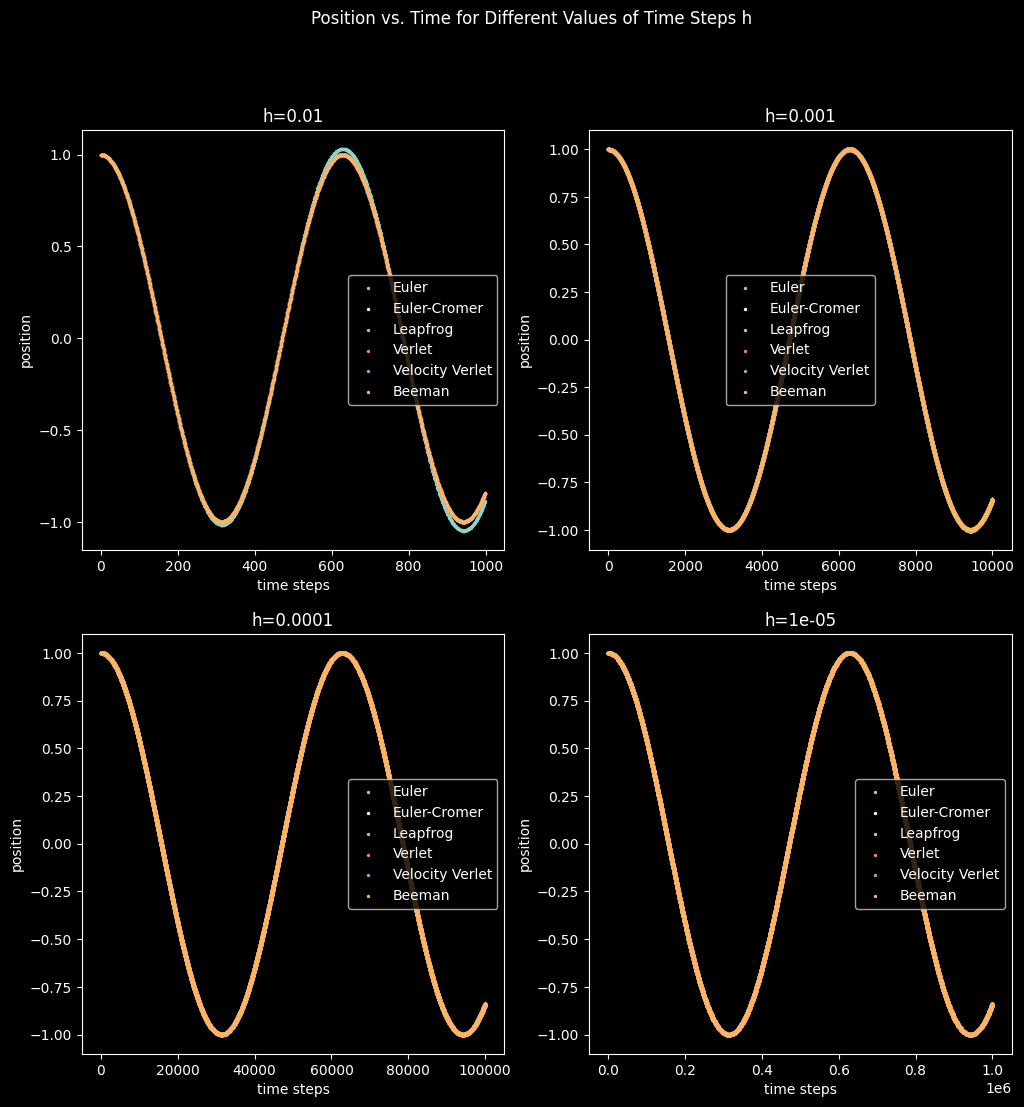

In [100]:
# This cell takes 2 minutes 11 seconds to execute:
fig, ax = plt.subplots(2, 2, figsize=(12,12))
fig.suptitle("Position vs. Time for Different Values of Time Steps h")

ax[0,0].scatter(range(len(df0)), df0[df0.columns[10]], s=2, label="Euler")
ax[0,0].scatter(range(len(df0)), df0[df0.columns[0]], s=2, label="Euler-Cromer")
ax[0,0].scatter(range(len(df0)), df0[df0.columns[2]], s=2, label="Leapfrog")
ax[0,0].scatter(range(len(df0)), df0[df0.columns[4]], s=2, label="Verlet")
ax[0,0].scatter(range(len(df0)), df0[df0.columns[6]], s=2, label="Velocity Verlet")
ax[0,0].scatter(range(len(df0)), df0[df0.columns[8]], s=2, label="Beeman")
ax[0,0].set_title(f"h={hs[0]}")
ax[0,0].set_xlabel("time steps")
ax[0,0].set_ylabel("position")
ax[0,0].legend();

ax[0,1].scatter(range(len(df1)), df1[df1.columns[10]], s=2, label="Euler")
ax[0,1].scatter(range(len(df1)), df1[df1.columns[0]], s=2, label="Euler-Cromer")
ax[0,1].scatter(range(len(df1)), df1[df1.columns[2]], s=2, label="Leapfrog")
ax[0,1].scatter(range(len(df1)), df1[df1.columns[4]], s=2, label="Verlet")
ax[0,1].scatter(range(len(df1)), df1[df1.columns[6]], s=2, label="Velocity Verlet")
ax[0,1].scatter(range(len(df1)), df1[df1.columns[8]], s=2, label="Beeman")
ax[0,1].set_title(f"h={hs[1]}")
ax[0,1].set_xlabel("time steps")
ax[0,1].set_ylabel("position")
ax[0,1].legend();

ax[1,0].scatter(range(len(df2)), df2[df2.columns[10]], s=2, label="Euler")
ax[1,0].scatter(range(len(df2)), df2[df2.columns[0]], s=2, label="Euler-Cromer")
ax[1,0].scatter(range(len(df2)), df2[df2.columns[2]], s=2, label="Leapfrog")
ax[1,0].scatter(range(len(df2)), df2[df2.columns[4]], s=2, label="Verlet")
ax[1,0].scatter(range(len(df2)), df2[df2.columns[6]], s=2, label="Velocity Verlet")
ax[1,0].scatter(range(len(df2)), df2[df2.columns[8]], s=2, label="Beeman")
ax[1,0].set_title(f"h={hs[2]}")
ax[1,0].set_xlabel("time steps")
ax[1,0].set_ylabel("position")
ax[1,0].legend();

ax[1,1].scatter(range(len(df3)), df3[df3.columns[10]], s=2, label="Euler")
ax[1,1].scatter(range(len(df3)), df3[df3.columns[0]], s=2, label="Euler-Cromer")
ax[1,1].scatter(range(len(df3)), df3[df3.columns[2]], s=2, label="Leapfrog")
ax[1,1].scatter(range(len(df3)), df3[df3.columns[4]], s=2, label="Verlet")
ax[1,1].scatter(range(len(df3)), df3[df3.columns[6]], s=2, label="Velocity Verlet")
ax[1,1].scatter(range(len(df3)), df3[df3.columns[8]], s=2, label="Beeman")
ax[1,1].set_title(f"h={hs[3]}")
ax[1,1].set_xlabel("time steps")
ax[1,1].set_ylabel("position")
ax[1,1].legend();

In [102]:
# Takes 32 seconds to save figure
# fig.savefig("postion_vs_time.jpg")

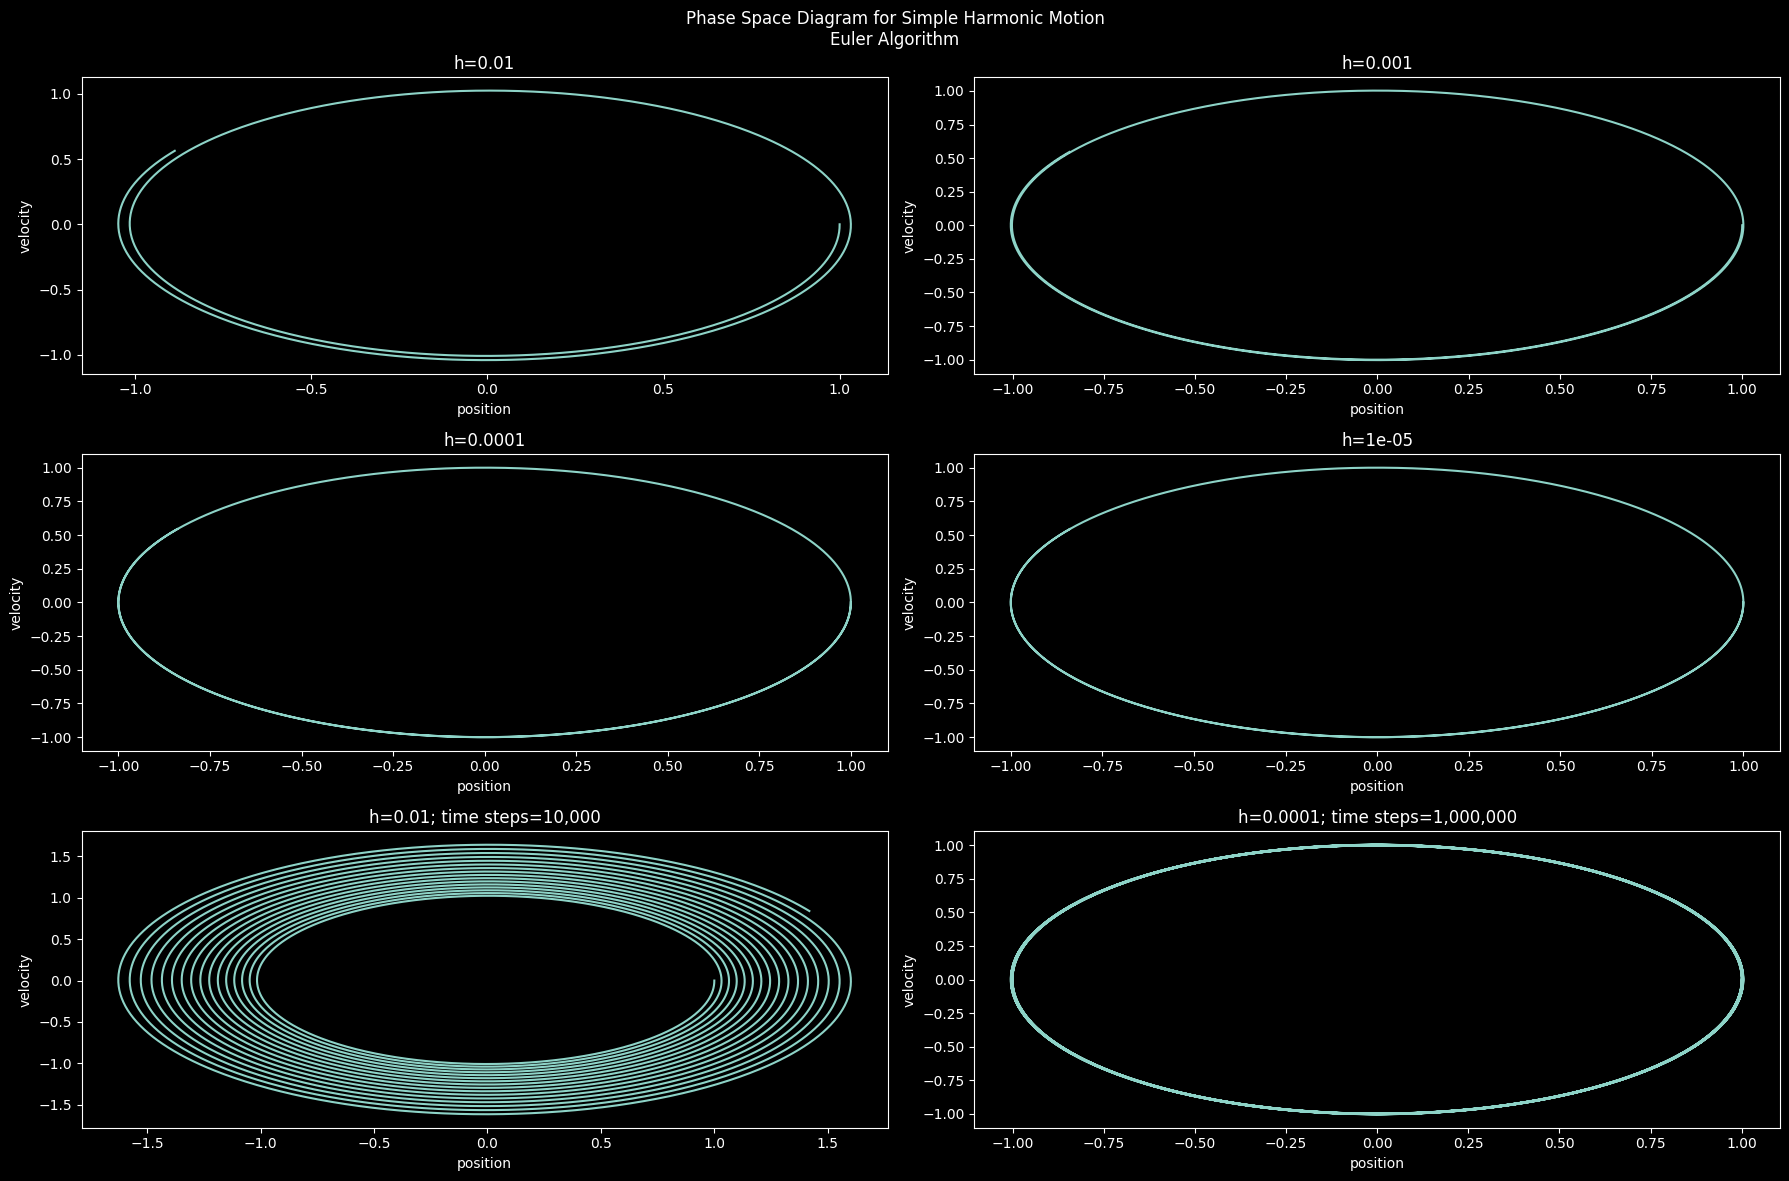

In [116]:
fig0, ax0 = plt.subplots(3, 2, figsize=(18,12))
fig0.suptitle("Phase Space Diagram for Simple Harmonic Motion\nEuler Algorithm")

ax0[0,0].plot(df0[df0.columns[10]], df0[df0.columns[11]])
ax0[0,0].set_title(f"h={hs[0]}")
ax0[0,0].set_xlabel("position")
ax0[0,0].set_ylabel("velocity")

ax0[0,1].plot(df1[df1.columns[10]], df1[df1.columns[11]])
ax0[0,1].set_title(f"h={hs[1]}")
ax0[0,1].set_xlabel("position")
ax0[0,1].set_ylabel("velocity")

ax0[1,0].plot(df2[df2.columns[10]], df2[df2.columns[11]])
ax0[1,0].set_title(f"h={hs[2]}")
ax0[1,0].set_xlabel("position")
ax0[1,0].set_ylabel("velocity")

ax0[1,1].plot(df3[df3.columns[10]], df3[df3.columns[11]])
ax0[1,1].set_title(f"h={hs[3]}")
ax0[1,1].set_xlabel("position")
ax0[1,1].set_ylabel("velocity");

ax0[2,0].plot(euler_algorithm(x0=x0, acc=acc, h=0.01, time=100)[0], euler_algorithm(x0=x0, acc=acc, h=0.01, time=100)[1])
ax0[2,0].set_title(f"h=0.01; time steps=10,000")
ax0[2,0].set_xlabel("position")
ax0[2,0].set_ylabel("velocity");

ax0[2,1].plot(euler_algorithm(x0=x0, acc=acc, h=0.0001, time=100)[0], euler_algorithm(x0=x0, acc=acc, h=0.0001, time=100)[1])
ax0[2,1].set_title(f"h=0.0001; time steps=1,000,000")
ax0[2,1].set_xlabel("position")
ax0[2,1].set_ylabel("velocity");
fig0.tight_layout();

In [117]:
fig0.savefig("PhaseDiagramEuler.jpg")

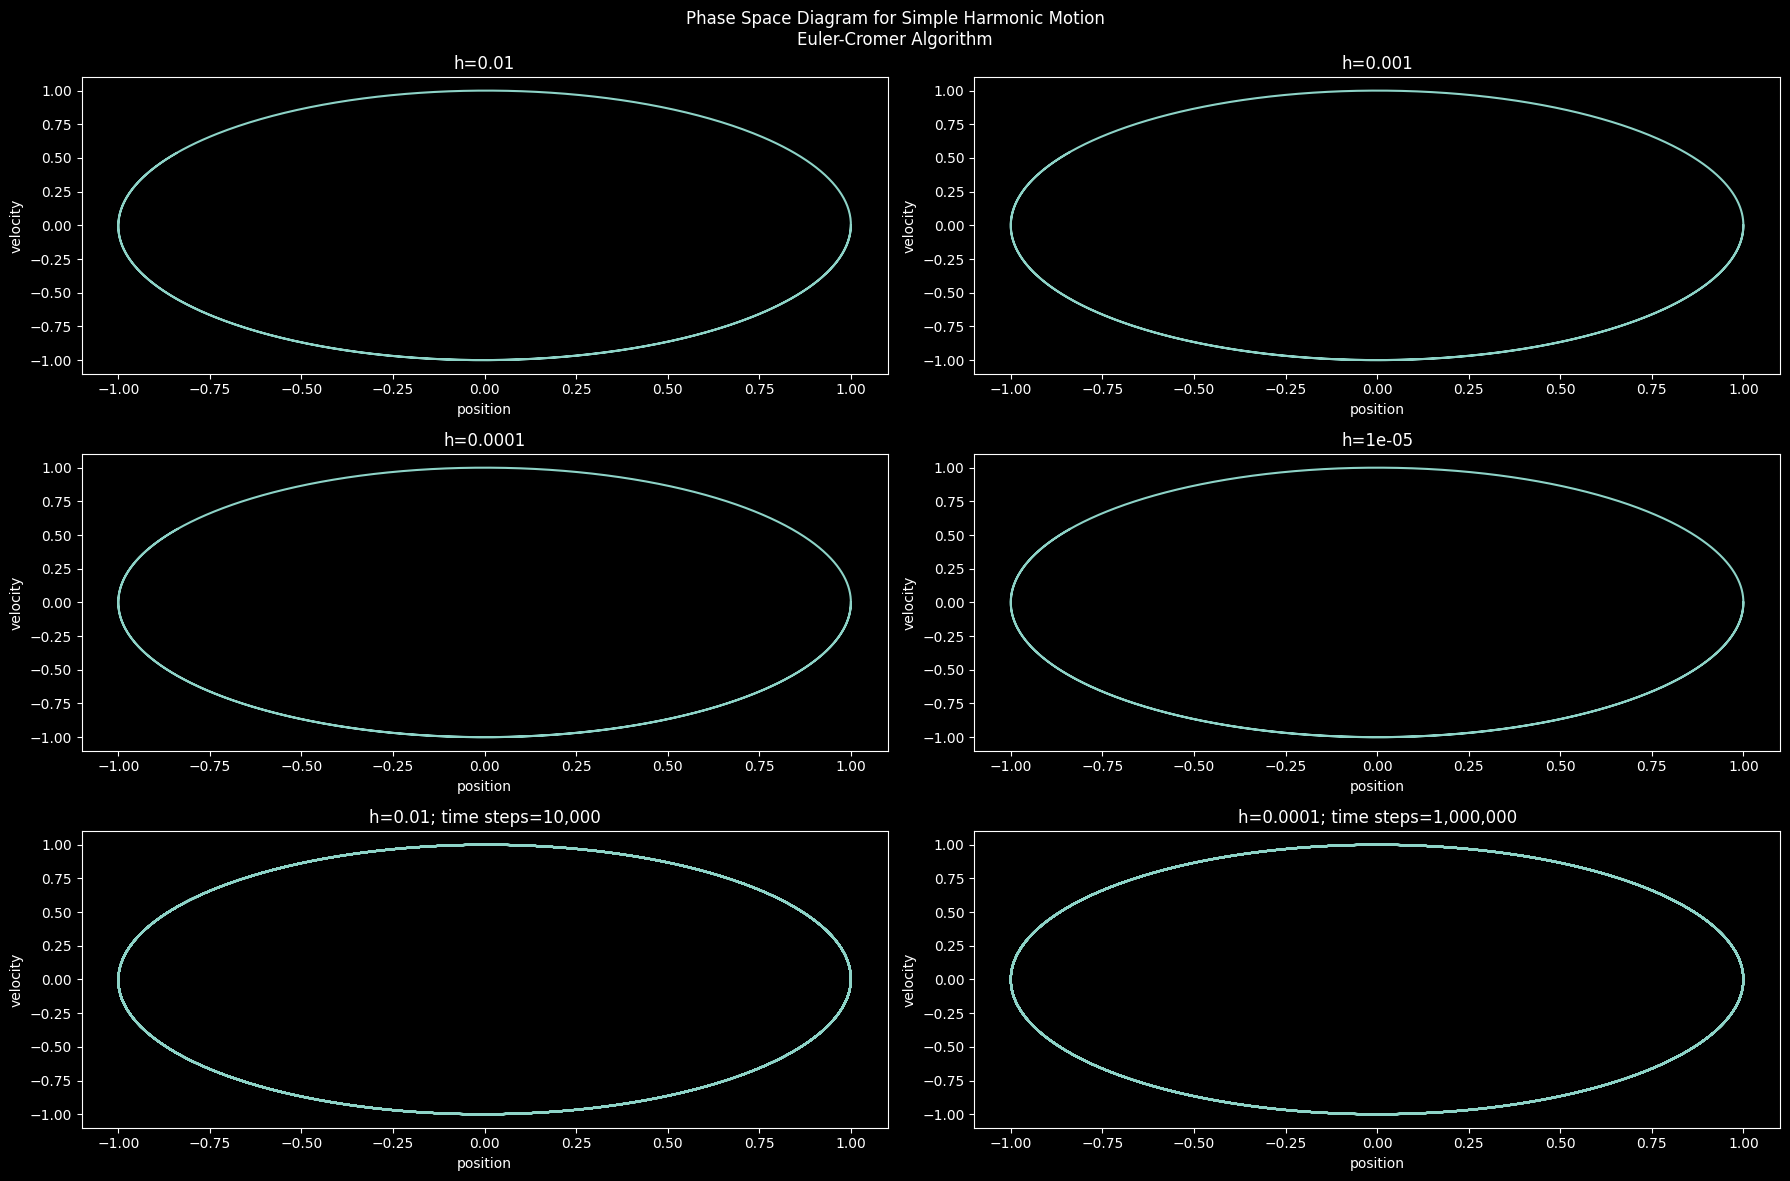

In [119]:
fig0, ax0 = plt.subplots(3, 2, figsize=(18,12))
fig0.suptitle("Phase Space Diagram for Simple Harmonic Motion\nEuler-Cromer Algorithm")

ax0[0,0].plot(df0[df0.columns[0]], df0[df0.columns[1]])
ax0[0,0].set_title(f"h={hs[0]}")
ax0[0,0].set_xlabel("position")
ax0[0,0].set_ylabel("velocity")

ax0[0,1].plot(df1[df1.columns[0]], df1[df1.columns[1]])
ax0[0,1].set_title(f"h={hs[1]}")
ax0[0,1].set_xlabel("position")
ax0[0,1].set_ylabel("velocity")

ax0[1,0].plot(df2[df2.columns[0]], df2[df2.columns[1]])
ax0[1,0].set_title(f"h={hs[2]}")
ax0[1,0].set_xlabel("position")
ax0[1,0].set_ylabel("velocity")

ax0[1,1].plot(df3[df3.columns[0]], df3[df3.columns[1]])
ax0[1,1].set_title(f"h={hs[3]}")
ax0[1,1].set_xlabel("position")
ax0[1,1].set_ylabel("velocity");

ax0[2,0].plot(euler_cromer_algorithm(x0=x0, acc=acc, h=0.01, time=100)[0], euler_cromer_algorithm(x0=x0, acc=acc, h=0.01, time=100)[1])
ax0[2,0].set_title(f"h=0.01; time steps=10,000")
ax0[2,0].set_xlabel("position")
ax0[2,0].set_ylabel("velocity");

ax0[2,1].plot(euler_cromer_algorithm(x0=x0, acc=acc, h=0.0001, time=100)[0], euler_cromer_algorithm(x0=x0, acc=acc, h=0.0001, time=100)[1])
ax0[2,1].set_title(f"h=0.0001; time steps=1,000,000")
ax0[2,1].set_xlabel("position")
ax0[2,1].set_ylabel("velocity")
fig0.tight_layout();

In [120]:
fig0.savefig("PhaseDiagramEulerCromer.jpg")

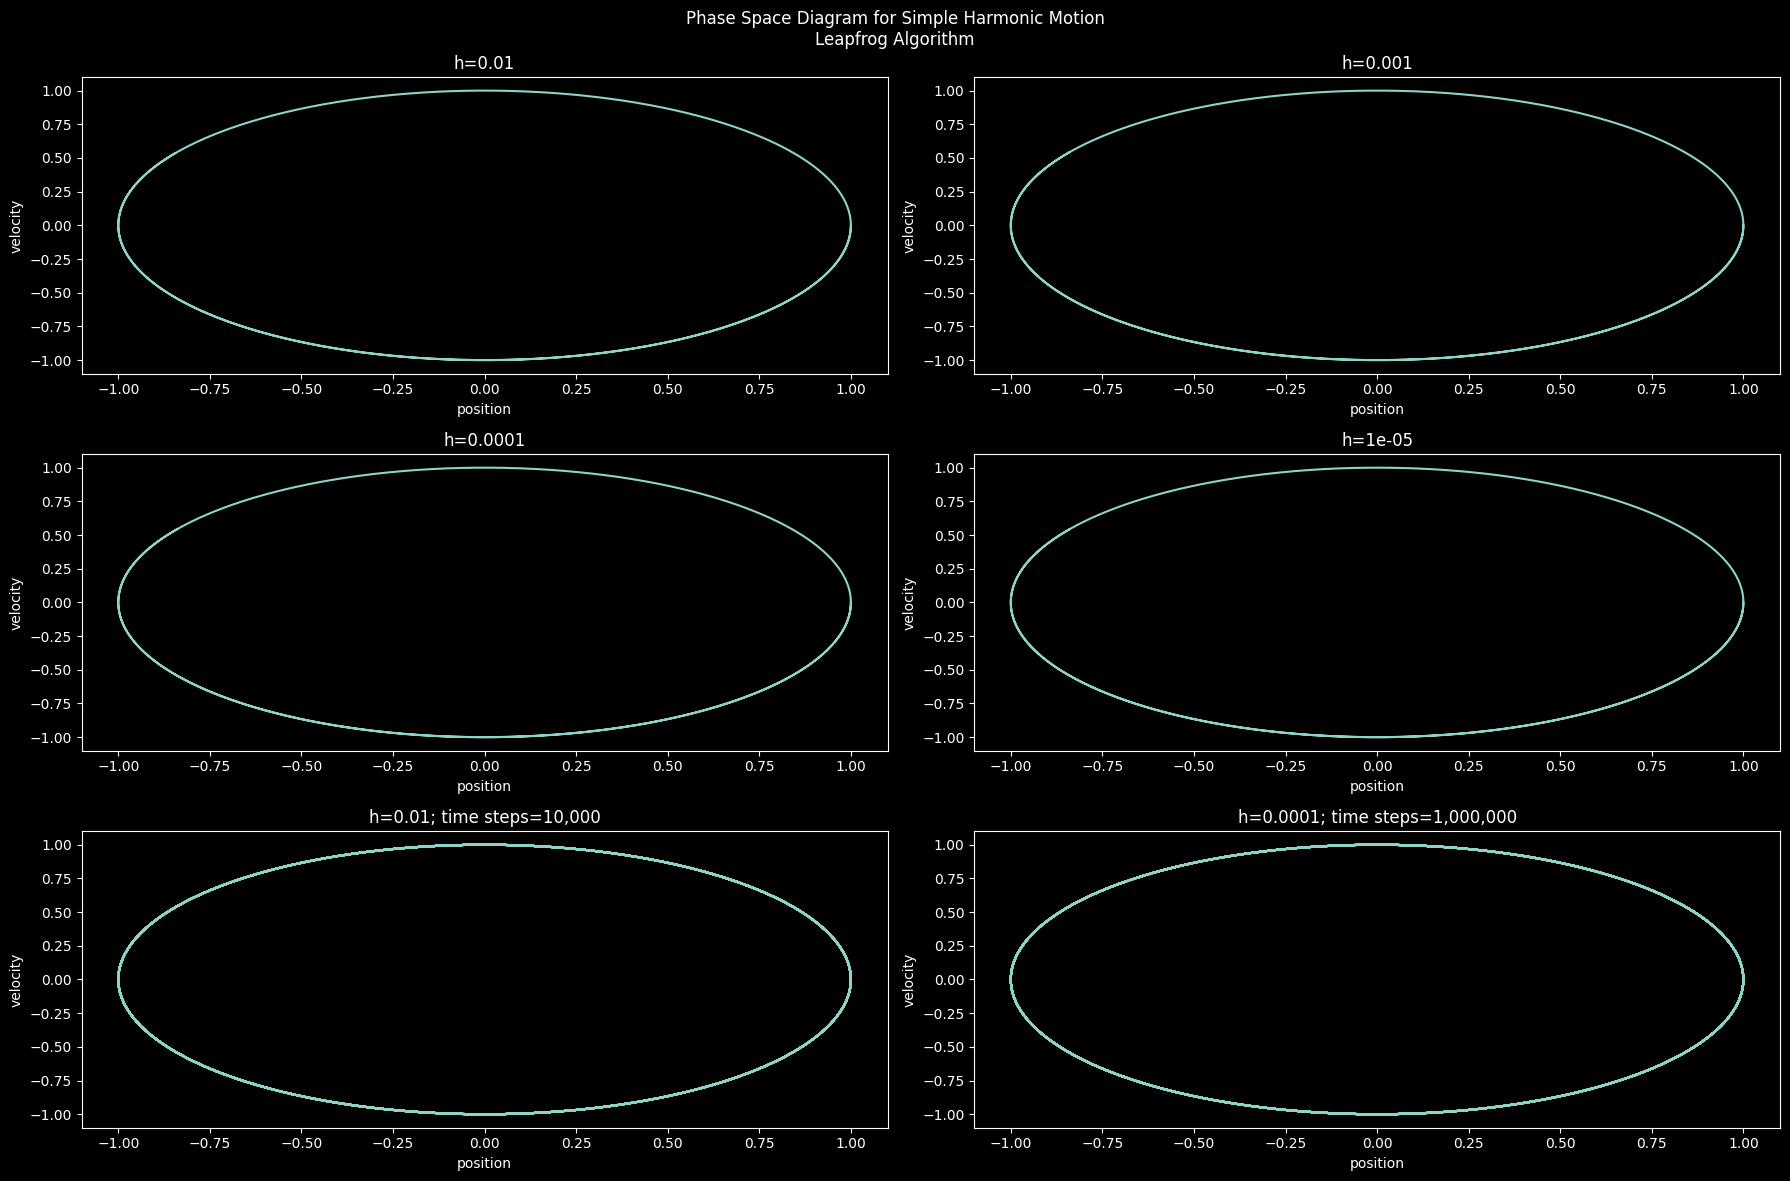

In [121]:
fig0, ax0 = plt.subplots(3, 2, figsize=(18,12))
fig0.suptitle("Phase Space Diagram for Simple Harmonic Motion\nLeapfrog Algorithm")

ax0[0,0].plot(df0[df0.columns[2]], df0[df0.columns[3]])
ax0[0,0].set_title(f"h={hs[0]}")
ax0[0,0].set_xlabel("position")
ax0[0,0].set_ylabel("velocity")

ax0[0,1].plot(df1[df1.columns[2]], df1[df1.columns[3]])
ax0[0,1].set_title(f"h={hs[1]}")
ax0[0,1].set_xlabel("position")
ax0[0,1].set_ylabel("velocity")

ax0[1,0].plot(df2[df2.columns[2]], df2[df2.columns[3]])
ax0[1,0].set_title(f"h={hs[2]}")
ax0[1,0].set_xlabel("position")
ax0[1,0].set_ylabel("velocity")

ax0[1,1].plot(df3[df3.columns[2]], df3[df3.columns[3]])
ax0[1,1].set_title(f"h={hs[3]}")
ax0[1,1].set_xlabel("position")
ax0[1,1].set_ylabel("velocity");

ax0[2,0].plot(leapfrog_algorithm(x0=x0, acc=acc, h=0.01, time=100)[0], leapfrog_algorithm(x0=x0, acc=acc, h=0.01, time=100)[1])
ax0[2,0].set_title(f"h=0.01; time steps=10,000")
ax0[2,0].set_xlabel("position")
ax0[2,0].set_ylabel("velocity");

ax0[2,1].plot(leapfrog_algorithm(x0=x0, acc=acc, h=0.0001, time=100)[0], leapfrog_algorithm(x0=x0, acc=acc, h=0.0001, time=100)[1])
ax0[2,1].set_title(f"h=0.0001; time steps=1,000,000")
ax0[2,1].set_xlabel("position")
ax0[2,1].set_ylabel("velocity");
fig0.tight_layout();

In [122]:
fig0.savefig("PhaseDiagramLeapfrog.jpg")

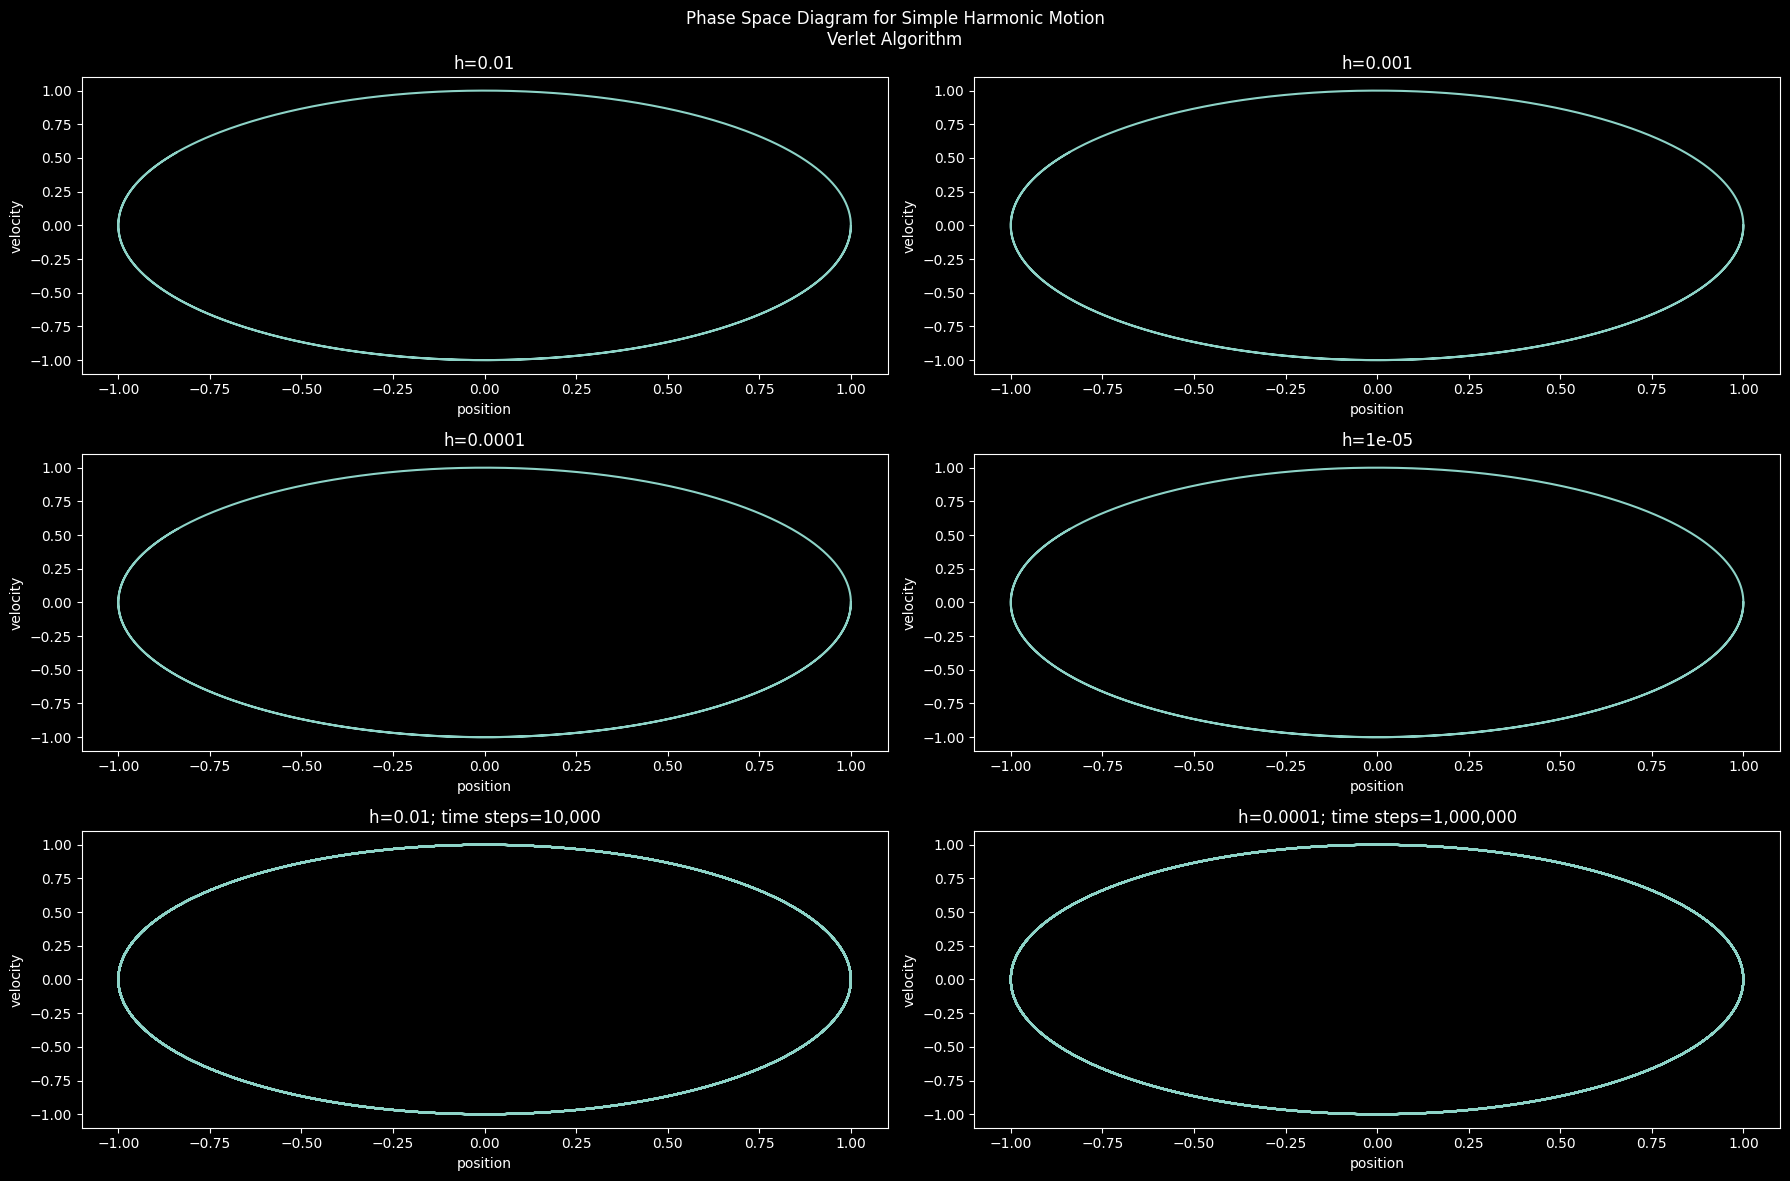

In [124]:
fig0, ax0 = plt.subplots(3, 2, figsize=(18,12))
fig0.suptitle("Phase Space Diagram for Simple Harmonic Motion\nVerlet Algorithm")

ax0[0,0].plot(df0[df0.columns[4]], df0[df0.columns[5]])
ax0[0,0].set_title(f"h={hs[0]}")
ax0[0,0].set_xlabel("position")
ax0[0,0].set_ylabel("velocity")

ax0[0,1].plot(df1[df1.columns[4]], df1[df1.columns[5]])
ax0[0,1].set_title(f"h={hs[1]}")
ax0[0,1].set_xlabel("position")
ax0[0,1].set_ylabel("velocity")

ax0[1,0].plot(df2[df2.columns[4]], df2[df2.columns[5]])
ax0[1,0].set_title(f"h={hs[2]}")
ax0[1,0].set_xlabel("position")
ax0[1,0].set_ylabel("velocity")

ax0[1,1].plot(df3[df3.columns[4]], df3[df3.columns[5]])
ax0[1,1].set_title(f"h={hs[3]}")
ax0[1,1].set_xlabel("position")
ax0[1,1].set_ylabel("velocity")

ax0[2,0].plot(verlet_algorithm(x0=x0, acc=acc, h=0.01, time=100)[0], verlet_algorithm(x0=x0, acc=acc, h=0.01, time=100)[1])
ax0[2,0].set_title(f"h=0.01; time steps=10,000")
ax0[2,0].set_xlabel("position")
ax0[2,0].set_ylabel("velocity");

ax0[2,1].plot(verlet_algorithm(x0=x0, acc=acc, h=0.0001, time=100)[0], verlet_algorithm(x0=x0, acc=acc, h=0.0001, time=100)[1])
ax0[2,1].set_title(f"h=0.0001; time steps=1,000,000")
ax0[2,1].set_xlabel("position")
ax0[2,1].set_ylabel("velocity")
fig0.tight_layout();

In [125]:
fig0.savefig("PhaseDiagramVerlet.jpg")

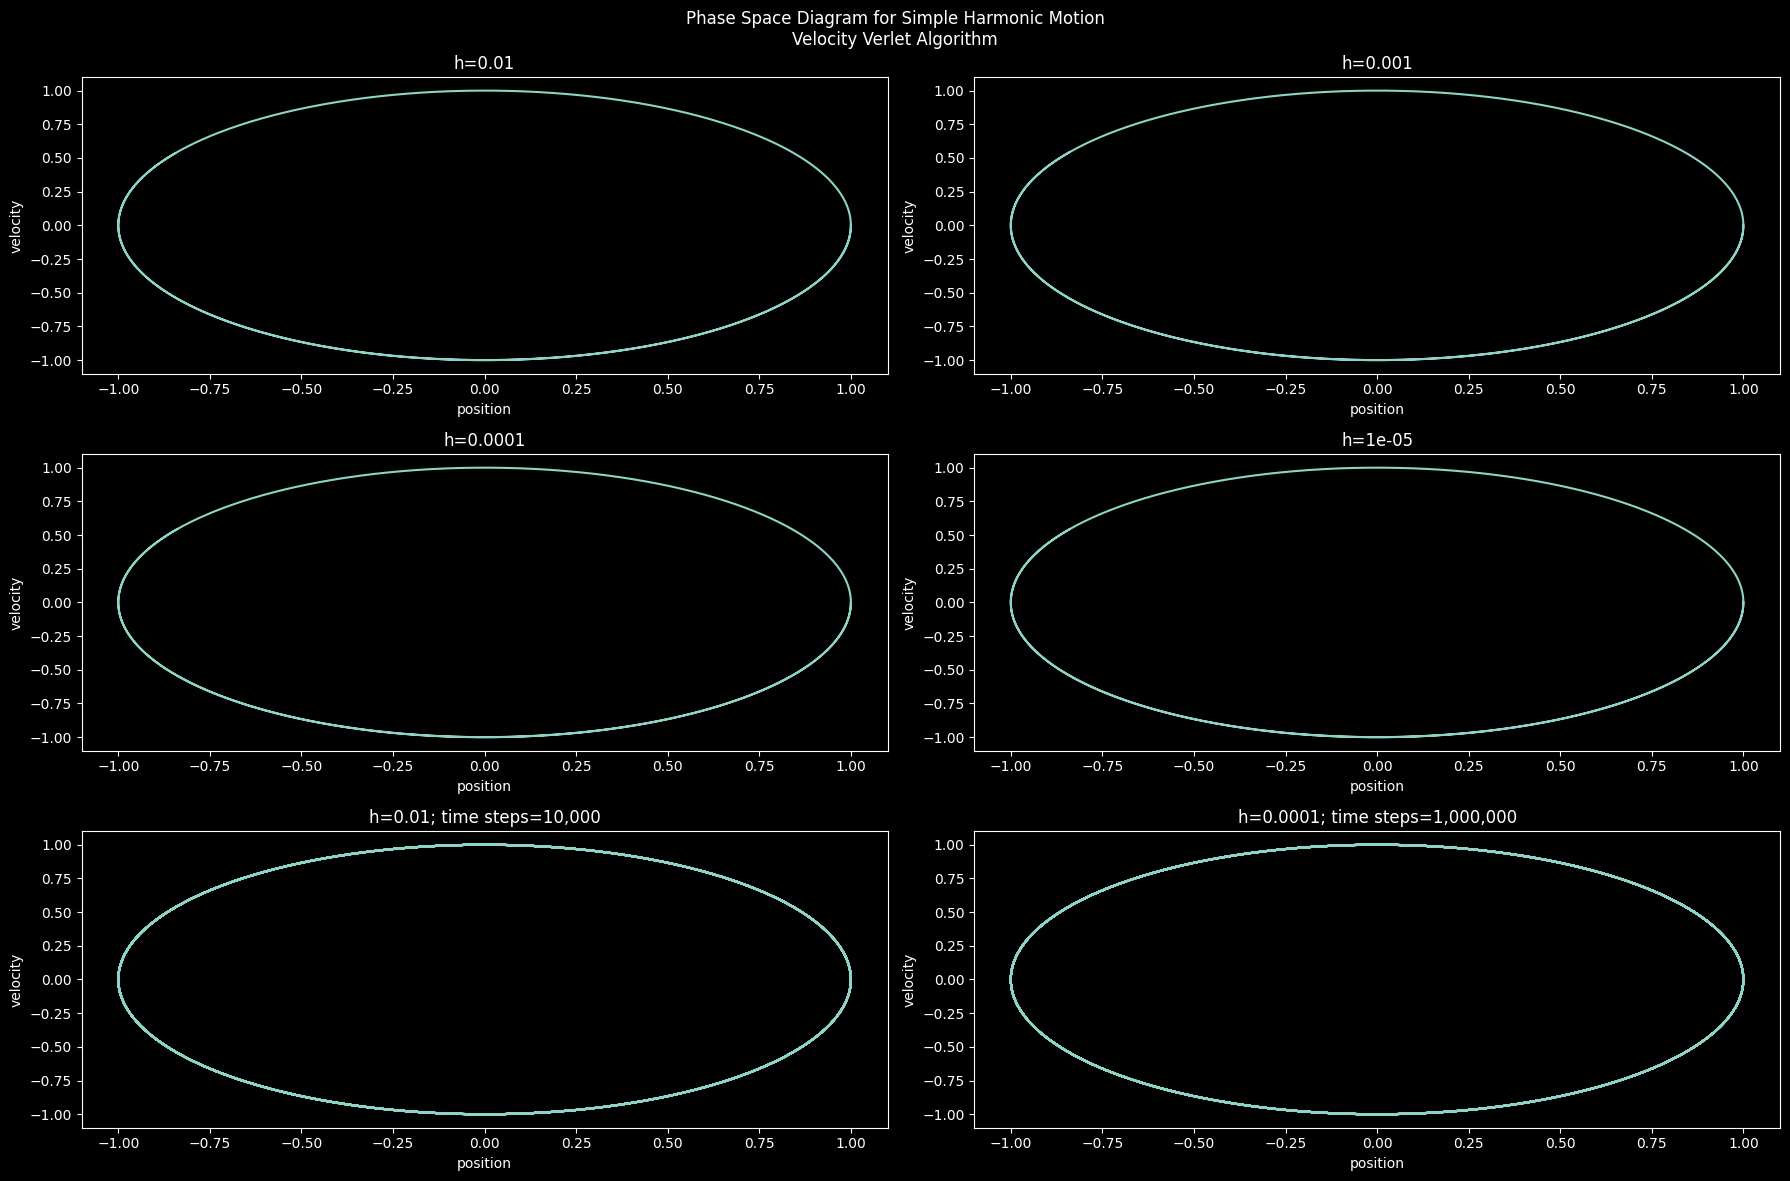

In [126]:
fig0, ax0 = plt.subplots(3, 2, figsize=(18,12))
fig0.suptitle("Phase Space Diagram for Simple Harmonic Motion\nVelocity Verlet Algorithm")

ax0[0,0].plot(df0[df0.columns[6]], df0[df0.columns[7]])
ax0[0,0].set_title(f"h={hs[0]}")
ax0[0,0].set_xlabel("position")
ax0[0,0].set_ylabel("velocity")

ax0[0,1].plot(df1[df1.columns[6]], df1[df1.columns[7]])
ax0[0,1].set_title(f"h={hs[1]}")
ax0[0,1].set_xlabel("position")
ax0[0,1].set_ylabel("velocity")

ax0[1,0].plot(df2[df2.columns[6]], df2[df2.columns[7]])
ax0[1,0].set_title(f"h={hs[2]}")
ax0[1,0].set_xlabel("position")
ax0[1,0].set_ylabel("velocity")

ax0[1,1].plot(df3[df3.columns[6]], df3[df3.columns[7]])
ax0[1,1].set_title(f"h={hs[3]}")
ax0[1,1].set_xlabel("position")
ax0[1,1].set_ylabel("velocity")

ax0[2,0].plot(velocity_verlet_algorithm(x0=x0, acc=acc, h=0.01, time=100)[0], velocity_verlet_algorithm(x0=x0, acc=acc, h=0.01, time=100)[1])
ax0[2,0].set_title(f"h=0.01; time steps=10,000")
ax0[2,0].set_xlabel("position")
ax0[2,0].set_ylabel("velocity")

ax0[2,1].plot(velocity_verlet_algorithm(x0=x0, acc=acc, h=0.0001, time=100)[0], velocity_verlet_algorithm(x0=x0, acc=acc, h=0.0001, time=100)[1])
ax0[2,1].set_title(f"h=0.0001; time steps=1,000,000")
ax0[2,1].set_xlabel("position")
ax0[2,1].set_ylabel("velocity")
fig0.tight_layout();

In [127]:
fig0.savefig("PhaseDiagramVelocityVerlet.jpg")

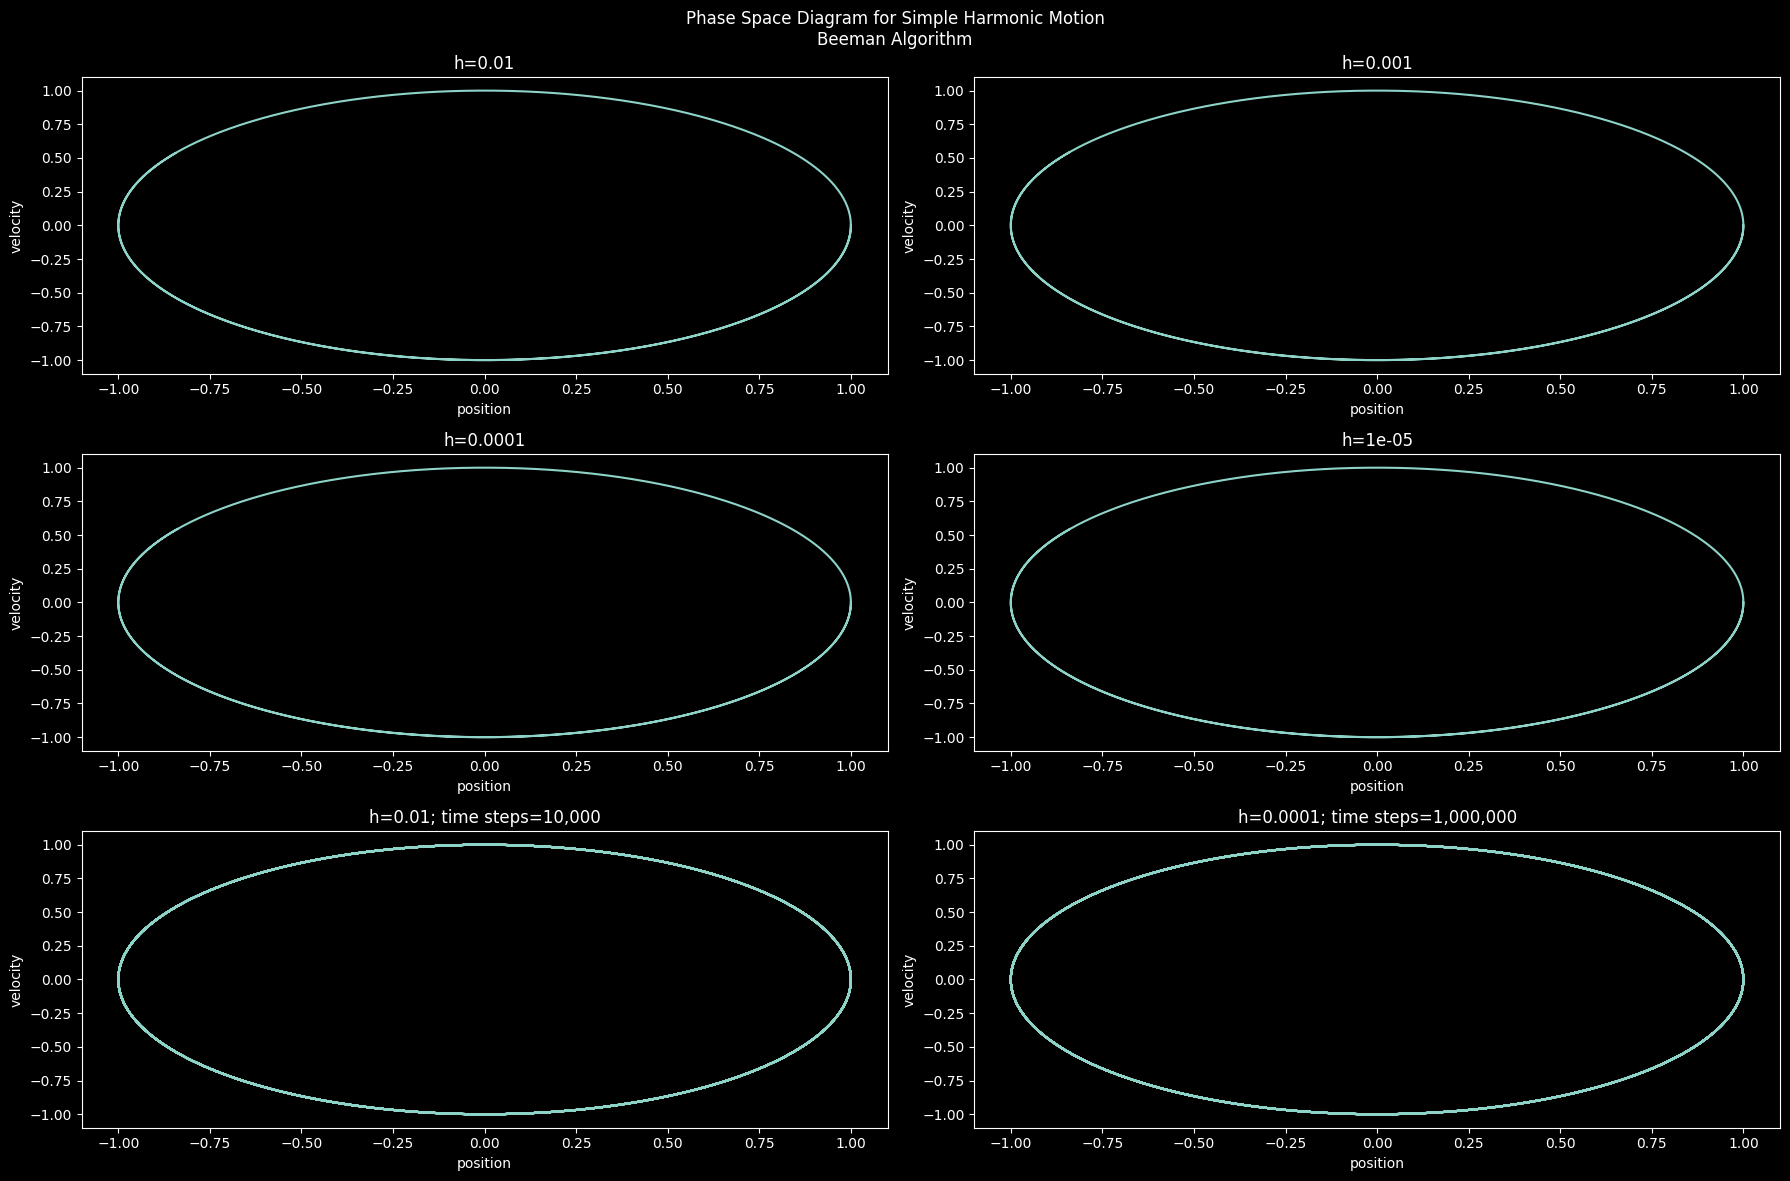

In [128]:
fig0, ax0 = plt.subplots(3, 2, figsize=(18,12))
fig0.suptitle("Phase Space Diagram for Simple Harmonic Motion\nBeeman Algorithm")

ax0[0,0].plot(df0[df0.columns[8]], df0[df0.columns[9]])
ax0[0,0].set_title(f"h={hs[0]}")
ax0[0,0].set_xlabel("position")
ax0[0,0].set_ylabel("velocity")

ax0[0,1].plot(df1[df1.columns[8]], df1[df1.columns[9]])
ax0[0,1].set_title(f"h={hs[1]}")
ax0[0,1].set_xlabel("position")
ax0[0,1].set_ylabel("velocity")

ax0[1,0].plot(df2[df2.columns[8]], df2[df2.columns[9]])
ax0[1,0].set_title(f"h={hs[2]}")
ax0[1,0].set_xlabel("position")
ax0[1,0].set_ylabel("velocity")

ax0[1,1].plot(df3[df3.columns[8]], df3[df3.columns[9]])
ax0[1,1].set_title(f"h={hs[3]}")
ax0[1,1].set_xlabel("position")
ax0[1,1].set_ylabel("velocity");

ax0[2,0].plot(beeman_algorithm(x0=x0, acc=acc, h=0.01, time=100)[0], beeman_algorithm(x0=x0, acc=acc, h=0.01, time=100)[1])
ax0[2,0].set_title(f"h=0.01; time steps=10,000")
ax0[2,0].set_xlabel("position")
ax0[2,0].set_ylabel("velocity")

ax0[2,1].plot(beeman_algorithm(x0=x0, acc=acc, h=0.0001, time=100)[0], beeman_algorithm(x0=x0, acc=acc, h=0.0001, time=100)[1])
ax0[2,1].set_title(f"h=0.0001; time steps=1,000,000")
ax0[2,1].set_xlabel("position")
ax0[2,1].set_ylabel("velocity")
fig0.tight_layout();

In [129]:
fig0.savefig("PhaseDiagramBeeman.jpg")

$\Large Bonus \ Question$

$\Large x(t) = x_0cos(\omega t) \quad \ and \quad v(t) = -x_0\omega sin(\omega t)$

In [191]:
# Takes 1 minute and 30 seconds.
x0 = 1
w = 1
# Different values for time and h:
times = [100, 1000, 1100, 1200, 1500, 1800, 2000]
hs = [0.1, 0.01, 0.001, 0.0001]
# This matrix contains all the data of errors for differents times and different hs:
error_euler = np.zeros(shape=(len(hs), len(times)))
for j in range(len(hs)):
    for i in range(len(times)):
        xs, vs = euler_algorithm(x0=x0, acc=acc, h=hs[j], time=times[i])
        x_numerical = xs[-1]
        v_numerical = vs[-1]
        x_analytical = x0 * np.cos(w * times[i])
        v_analytical = -x0 * w * np.sin(w * times[i])
        # Error (distance of numerical value and the analytical value in the phase space):
        error_euler[j, i] = np.sqrt((x_analytical-x_numerical)**2 + (v_analytical-v_numerical)**2)

In [158]:
# Takes 1 minute and 30 seconds.
x0 = 1
w = 1
# Different values for time and h:
times = [100, 1000, 1100, 1200, 1500, 1800, 2000]
hs = [0.1, 0.01, 0.001, 0.0001]
# This matrix contains all the data of errors for differents times and different hs:
error_euler_cromer = np.zeros(shape=(len(hs), len(times)))
for j in range(len(hs)):
    for i in range(len(times)):
        xs, vs = euler_cromer_algorithm(x0=x0, acc=acc, h=hs[j], time=times[i])
        x_numerical = xs[-1]
        v_numerical = vs[-1]
        x_analytical = x0 * np.cos(w * times[i])
        v_analytical = -x0 * w * np.sin(w * times[i])
        # Error (distance of numerical value and the analytical value in the phase space):
        error_euler_cromer[j, i] = np.sqrt((x_analytical-x_numerical)**2 + (v_analytical-v_numerical)**2)

In [167]:
# Takes 3 minutes and 13 seconds.
x0 = 1
w = 1
# Different values for time and h:
times = [100, 1000, 1100, 1200, 1500, 1800, 2000]
hs = [0.1, 0.01, 0.001, 0.0001]
# This matrix contains all the data of errors for differents times and different hs:
error_leapfrog = np.zeros(shape=(len(hs), len(times)))
for j in range(len(hs)):
    for i in range(len(times)):
        xs, vs = leapfrog_algorithm(x0=x0, acc=acc, h=hs[j], time=times[i])
        x_numerical = xs[-1]
        v_numerical = vs[-1]
        x_analytical = x0 * np.cos(w * times[i])
        v_analytical = -x0 * w * np.sin(w * times[i])
        # Error (distance of numerical value and the analytical value in the phase space):
        error_leapfrog[j, i] = np.sqrt((x_analytical-x_numerical)**2 + (v_analytical-v_numerical)**2)

In [168]:
# Takes 2 minutes and 8 seconds.
x0 = 1
w = 1
# Different values for time and h:
times = [100, 1000, 1100, 1200, 1500, 1800, 2000]
hs = [0.1, 0.01, 0.001, 0.0001]
# This matrix contains all the data of errors for differents times and different hs:
error_verlet = np.zeros(shape=(len(hs), len(times)))
for j in range(len(hs)):
    for i in range(len(times)):
        xs, vs = verlet_algorithm(x0=x0, acc=acc, h=hs[j], time=times[i])
        x_numerical = xs[-1]
        v_numerical = vs[-1]
        x_analytical = x0 * np.cos(w * times[i])
        v_analytical = -x0 * w * np.sin(w * times[i])
        # Error (distance of numerical value and the analytical value in the phase space):
        error_verlet[j, i] = np.sqrt((x_analytical-x_numerical)**2 + (v_analytical-v_numerical)**2)

In [169]:
# Takes 3 minutes and 30 seconds.
x0 = 1
w = 1
# Different values for time and h:
times = [100, 1000, 1100, 1200, 1500, 1800, 2000]
hs = [0.1, 0.01, 0.001, 0.0001]
# This matrix contains all the data of errors for differents times and different hs:
error_velocity_verlet = np.zeros(shape=(len(hs), len(times)))
for j in range(len(hs)):
    for i in range(len(times)):
        xs, vs = velocity_verlet_algorithm(x0=x0, acc=acc, h=hs[j], time=times[i])
        x_numerical = xs[-1]
        v_numerical = vs[-1]
        x_analytical = x0 * np.cos(w * times[i])
        v_analytical = -x0 * w * np.sin(w * times[i])
        # Error (distance of numerical value and the analytical value in the phase space):
        error_velocity_verlet[j, i] = np.sqrt((x_analytical-x_numerical)**2 + (v_analytical-v_numerical)**2)

In [170]:
# Takes 5 minutes and 3 seconds.
x0 = 1
w = 1
# Different values for time and h:
times = [100, 1000, 1100, 1200, 1500, 1800, 2000]
hs = [0.1, 0.01, 0.001, 0.0001]
# This matrix contains all the data of errors for differents times and different hs:
error_beeman = np.zeros(shape=(len(hs), len(times)))
for j in range(len(hs)):
    for i in range(len(times)):
        xs, vs = beeman_algorithm(x0=x0, acc=acc, h=hs[j], time=times[i])
        x_numerical = xs[-1]
        v_numerical = vs[-1]
        x_analytical = x0 * np.cos(w * times[i])
        v_analytical = -x0 * w * np.sin(w * times[i])
        # Error (distance of numerical value and the analytical value in the phase space):
        error_beeman[j, i] = np.sqrt((x_analytical-x_numerical)**2 + (v_analytical-v_numerical)**2)

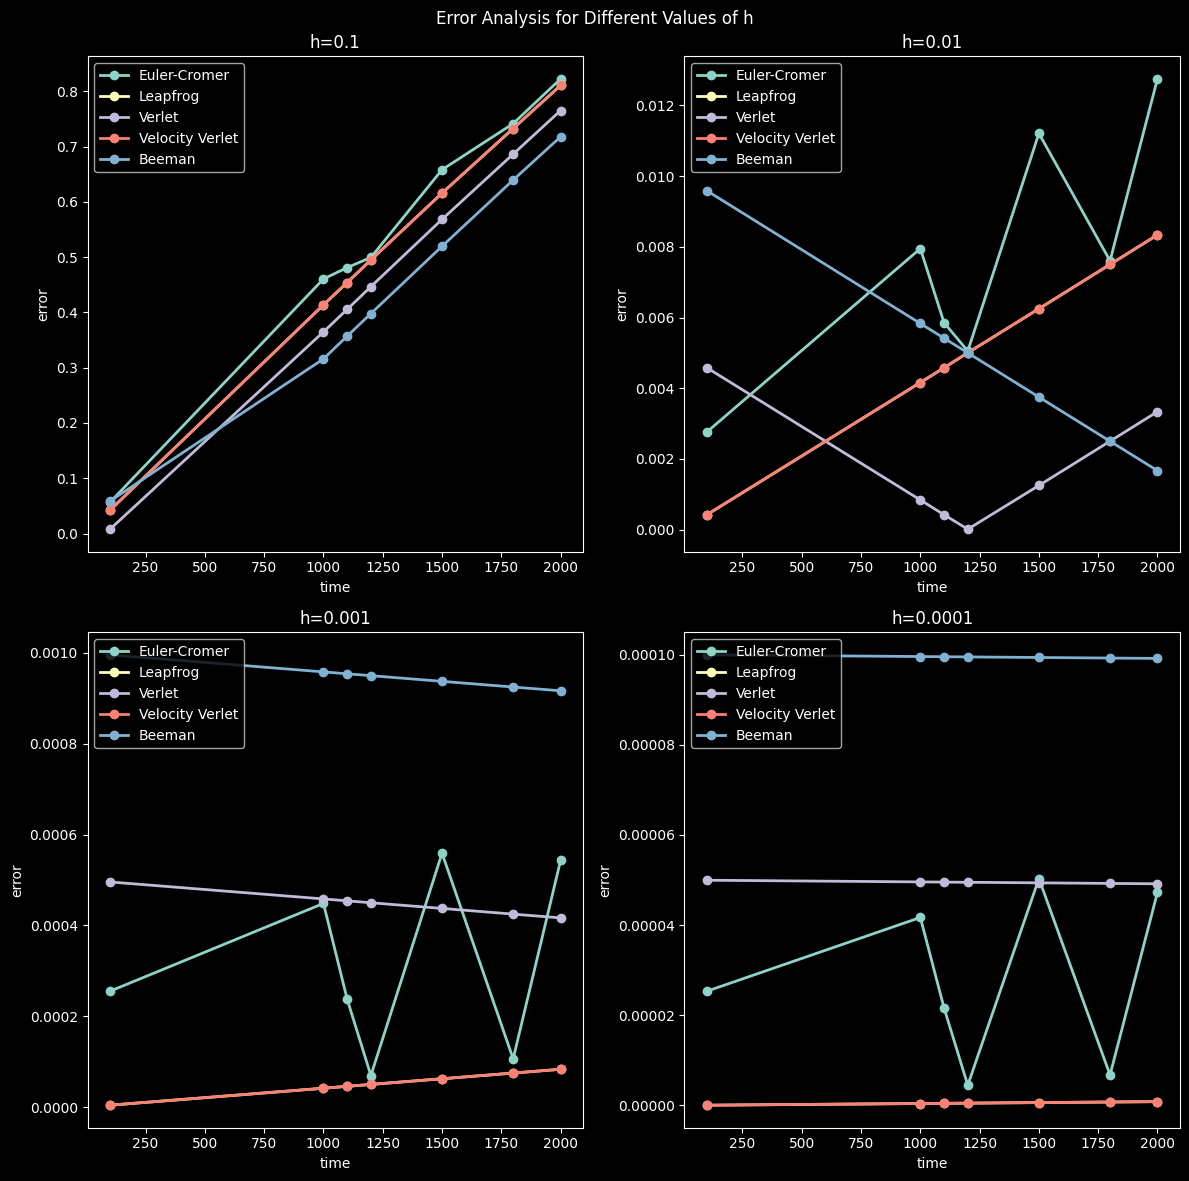

In [178]:
fig2, ax2 = plt.subplots(2, 2, figsize=(12,12))
fig2.suptitle("Error Analysis for Different Values of h")

for i in range(len(hs)):
    # Euler method errors are extremely high, so I refrained from plotting them.
    # ax2.ravel()[i].plot(times, error_euler[i],           lw=2, marker="o", label="Euler")
    ax2.ravel()[i].plot(times, error_euler_cromer[i],    lw=2, marker="o", label="Euler-Cromer")
    ax2.ravel()[i].plot(times, error_leapfrog[i],        lw=2, marker="o", label="Leapfrog")
    ax2.ravel()[i].plot(times, error_verlet[i],          lw=2, marker="o", label="Verlet")
    ax2.ravel()[i].plot(times, error_velocity_verlet[i], lw=2, marker="o", label="Velocity Verlet")
    ax2.ravel()[i].plot(times, error_beeman[i],          lw=2, marker="o", label="Beeman")
    ax2.ravel()[i].set_title(f"h={hs[i]}")
    ax2.ravel()[i].set_xlabel("time")
    ax2.ravel()[i].set_ylabel("error")
    ax2.ravel()[i].legend()


fig2.tight_layout();

In [180]:
# fig2.savefig("ErrorAnalysis.jpg")

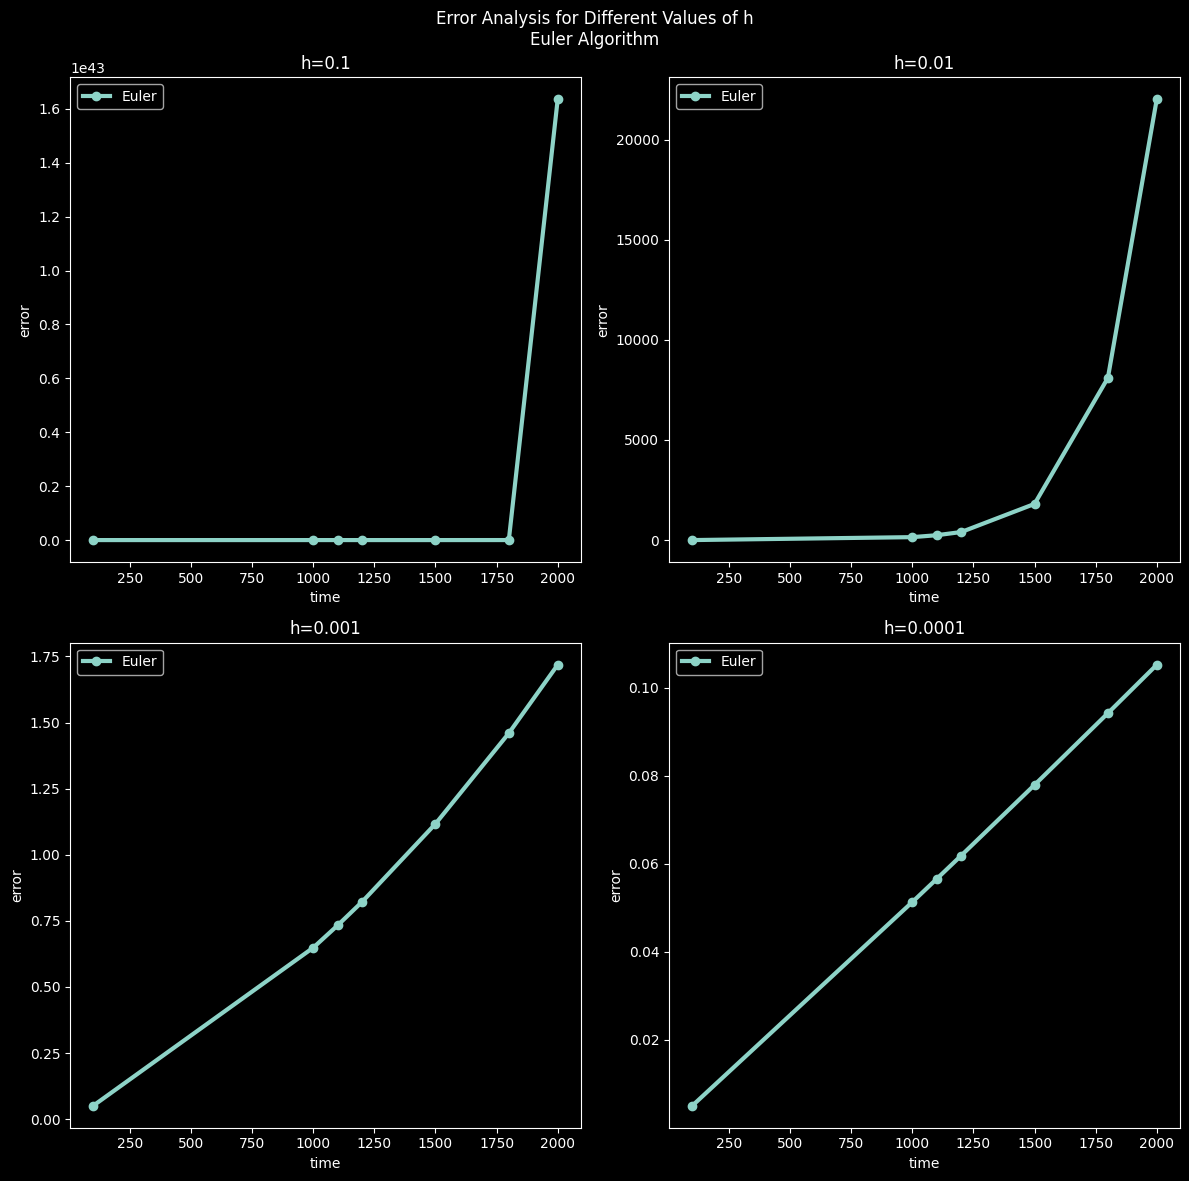

In [197]:
fig2, ax2 = plt.subplots(2, 2, figsize=(12,12))
fig2.suptitle("Error Analysis for Different Values of h\nEuler Algorithm")

for i in range(len(hs)):
    ax2.ravel()[i].plot(times, error_euler[i], lw=3, marker="o", label="Euler")
    ax2.ravel()[i].set_title(f"h={hs[i]}")
    ax2.ravel()[i].set_xlabel("time")
    ax2.ravel()[i].set_ylabel("error")
    ax2.ravel()[i].legend()


fig2.tight_layout();

In [198]:
# fig2.savefig("ErrorAnalysisEuler.jpg")